In [80]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [81]:
# dataset=pd.read_csv(filepath, header =,names=, na_values= , parse_dates=[[0,1,2]]) 

df=pd.read_csv('C:/Users/velth/Desktop/Springboard/datasets/hmeq.csv')
#print(df)

#inital review of data with info() and head () methods
df.head()
df.info()
#print (type(df))



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5960 non-null int64
LOAN       5960 non-null int64
MORTDUE    5442 non-null float64
VALUE      5848 non-null float64
REASON     5708 non-null object
JOB        5681 non-null object
YOJ        5445 non-null float64
DEROG      5252 non-null float64
DELINQ     5380 non-null float64
CLAGE      5652 non-null float64
NINQ       5450 non-null float64
CLNO       5738 non-null float64
DEBTINC    4693 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [95]:
# Frequency counts on categorical columns JOB and REASON to view different job types  

print(df.JOB.value_counts(dropna=False))
print(df.REASON.value_counts(dropna=False))

Other      2388
ProfExe    1276
Office      948
Mgr         767
NaN         279
Self        193
Sales       109
Name: JOB, dtype: int64
DebtCon    3928
HomeImp    1780
NaN         252
Name: REASON, dtype: int64


In [83]:
# CONVERTING DATA TYPES of COLUMNS


# Converting object type to category for columns 'REASON' and 'JOB' and 'BAD'

df['JOB'] =df['JOB'].astype('category')
df['REASON']=df['REASON'].astype('category')
df['BAD']=df['BAD'].astype('category')

# Converting Float to Integer data type
df['CLAGE']=pd.to_numeric(df['CLAGE'],errors='ignore',downcast='signed')

df.info()


#print(type(df.REASON))


#converting the column CLAGE from float to integers to round off clage since its number of months

#df=df.astype({"CLAGE":int})
#or 
#df['CLAGE']=df['CLAGE'].apply(np.int64)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5960 non-null category
LOAN       5960 non-null int64
MORTDUE    5442 non-null float64
VALUE      5848 non-null float64
REASON     5708 non-null category
JOB        5681 non-null category
YOJ        5445 non-null float64
DEROG      5252 non-null float64
DELINQ     5380 non-null float64
CLAGE      5652 non-null float64
NINQ       5450 non-null float64
CLNO       5738 non-null float64
DEBTINC    4693 non-null float64
dtypes: category(3), float64(9), int64(1)
memory usage: 483.2 KB


count    5738.000000
mean       21.296096
std        10.138933
min         0.000000
25%        15.000000
50%        20.000000
75%        26.000000
max        71.000000
Name: CLNO, dtype: float64
count     5960.000000
mean     18607.969799
std      11207.480417
min       1100.000000
25%      11100.000000
50%      16300.000000
75%      23300.000000
max      89900.000000
Name: LOAN, dtype: float64


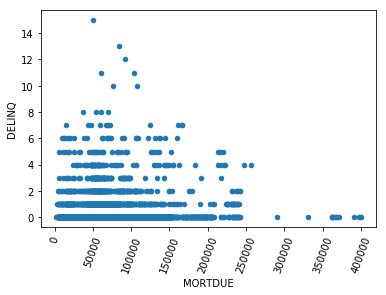

In [84]:
# OUTLIERS

# Reviewing columns to find outliers  , CLNO: Number of credit lines

print (df.CLNO.describe())  
print (df.LOAN.describe())
# Scatter plots to see relationsip between two numeric columns

df.plot(kind='scatter', x='MORTDUE',y='DELINQ',rot=70)
plt.show()

# From the results, There is a few around 400K MORTDUE as outliers 

# Also interesting to note that DELINQ(no of delinquent credit lines) is not co-related to MORTDUE(amount due on existing mortgage) 



In [132]:
# Removing any duplicate values in the data if existed 

df=df.drop_duplicates()
#print(df)  # There were no duplicate values in the data

# Getting the count of the missing values

df_missing=df.dropna()
df_missing # Almost 40 % of the data wil be lost if we drop all the missing values 




,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0000,39025.000000,HomeImp,Other,10.500000,0.0,0.0,94.366667,1.0,9.000000,33.779915
1,1,1300,70053.0000,68400.000000,HomeImp,Other,7.000000,0.0,2.0,121.833333,0.0,14.000000,33.779915
2,1,1500,13500.0000,16700.000000,HomeImp,Other,4.000000,0.0,0.0,149.466667,1.0,10.000000,33.779915
3,1,1500,73760.8172,101776.048741,DebtCon,Other,8.922268,0.0,0.0,179.766275,0.0,21.296096,33.779915
4,0,1700,97800.0000,112000.000000,HomeImp,Office,3.000000,0.0,0.0,93.333333,0.0,14.000000,33.779915
5,1,1700,30548.0000,40320.000000,HomeImp,Other,9.000000,0.0,0.0,101.466002,1.0,8.000000,37.113614
6,1,1800,48649.0000,57037.000000,HomeImp,Other,5.000000,3.0,2.0,77.100000,1.0,17.000000,33.779915
7,1,1800,28502.0000,43034.000000,HomeImp,Other,11.000000,0.0,0.0,88.766030,0.0,8.000000,36.884894
8,1,2000,32700.0000,46740.000000,HomeImp,Other,3.000000,0.0,2.0,216.933333,1.0,12.000000,33.779915
9,1,2000,73760.8172,62250.000000,HomeImp,Sales,16.000000,0.0,0.0,115.800000,0.0,13.000000,33.779915


In [131]:
# REPLACING MISSING VALUES

# Most common category is replaced for missing values of categorical columns

df.JOB=df.JOB.fillna('Other')
df.REASON=df.REASON.fillna('DebtCon')

# Mean of the values are filled for missing values of other columns

df.MORTDUE=df.MORTDUE.fillna(df.MORTDUE.mean())
df.VALUE=df.VALUE.fillna(df.VALUE.mean())
df.YOJ= df.YOJ.fillna(df.YOJ.mean())
df.CLAGE=df.CLAGE.fillna(df.CLAGE.mean())
df.CLNO =df.CLNO.fillna(df.CLNO.mean())
df.DEBTINC =df.DEBTINC.fillna(df.DEBTINC.mean())

df.DEROG.value_counts() # since 76% of the values are 0 , it will be imputed for NA 
df.DEROG=df.DEROG.fillna(0)

df.DELINQ.value_counts() # since 70% of values are 0,it will be imputed for NA 
df.DELINQ=df.DELINQ.fillna(0)

df.NINQ.value_counts(dropna=False) # since 42% of values are 0,it will be imputed for NA 

df.NINQ=df.NINQ.fillna(0)

df.isnull().sum() # Verified that there are no null values


BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [ ]:
#   VISALUIZATION

# df.plot(x=x_value,y=y_value)
#plt.show()

#df.plot(color='red')


# x_value=df['BAD'].values
# y_value=df['JOB']
# type(y_value)



#plt.plot(x=x_value,y=y_value)
#plt.show()


# Plot all columns as subplots. To do so, you need to specify subplots=True inside .plot().



# QUESTIONS 

# which loans default the most ?

# which occupation defaults the most ?

# What is the corelation between dergatory reports and default ?
